In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

array([[175, 177, 181, ..., 223, 223, 223],
       [138, 140, 144, ..., 223, 223, 223],
       [137, 138, 140, ..., 223, 223, 223],
       ...,
       [ 52,  52,  52, ...,  62,  62,  62],
       [ 54,  54,  55, ...,  62,  61,  61],
       [ 58,  58,  58, ...,  61,  61,  61]], dtype=uint8)
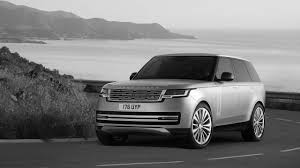

In [3]:
img = cv2.imread("/content/drive/MyDrive/Image Processing Lab/car.jpg", 0)
img

In [16]:
def histogram_equalization():
    """
    Perform histogram equalization on a grayscale image
    """

    # Step 1: Read the input grayscale image
    img = cv2.imread("/content/drive/MyDrive/Image Processing Lab/car.jpg", cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return None

    # Get image dimensions
    height, width = img.shape
    total_pixels = height * width

    print(f"Image Dimensions: {height}x{width}")
    print(f"Total Pixels: {total_pixels}")

    # Step 2: Compute the histogram of the image
    hist = np.zeros(256, dtype=int)

    # Efficient way using numpy
    hist, _ = np.histogram(img.flatten(), 256, [0, 256])

    # Step 3: Normalize the histogram (probability distribution)
    hist_normalized = hist / total_pixels

    # Step 4: Compute the cumulative distribution function (CDF)
    cdf = np.cumsum(hist_normalized)

    # Step 5: Map old gray levels to new gray levels using CDF
    # s = (L-1) * CDF where L = 256 (0-255)
    L = 256
    new_values = np.zeros(256, dtype=int)

    for i in range(256):
        new_values[i] = int(round((L - 1) * cdf[i]))

    # Step 6: Create enhanced image with new values using vectorization
    enhanced_img = new_values[img]

    return img, enhanced_img, hist, cdf, new_values

In [17]:
def display_results(original, enhanced, hist, cdf, new_values):
    """
    Display original and enhanced images with histograms
    """
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    # Original Image
    axes[0, 0].imshow(original, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Original Histogram
    axes[0, 1].bar(range(256), hist)
    axes[0, 1].set_title('Original Histogram')
    axes[0, 1].set_xlabel('Pixel Intensity')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_xlim([0, 255])

    # Original CDF
    axes[0, 2].plot(range(256), cdf, 'r-')
    axes[0, 2].set_title('Cumulative Distribution Function')
    axes[0, 2].set_xlabel('Pixel Intensity')
    axes[0, 2].set_ylabel('CDF')
    axes[0, 2].set_xlim([0, 255])
    axes[0, 2].grid(True)

    # Transformation Function
    axes[0, 3].plot(range(256), new_values, 'g-')
    axes[0, 3].set_title('Transformation Function')
    axes[0, 3].set_xlabel('Original Intensity')
    axes[0, 3].set_ylabel('New Intensity')
    axes[0, 3].set_xlim([0, 255])
    axes[0, 3].set_ylim([0, 255])
    axes[0, 3].grid(True)

    # Enhanced Image
    axes[1, 0].imshow(enhanced, cmap='gray')
    axes[1, 0].set_title('Enhanced Image')
    axes[1, 0].axis('off')

    # Enhanced Histogram
    enhanced_hist, _ = np.histogram(enhanced.flatten(), 256, [0, 256])
    axes[1, 1].bar(range(256), enhanced_hist)
    axes[1, 1].set_title('Enhanced Histogram')
    axes[1, 1].set_xlabel('Pixel Intensity')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_xlim([0, 255])

    # Enhanced CDF
    enhanced_cdf = np.cumsum(enhanced_hist) / np.sum(enhanced_hist)
    axes[1, 2].plot(range(256), enhanced_cdf, 'r-')
    axes[1, 2].set_title('Enhanced CDF')
    axes[1, 2].set_xlabel('Pixel Intensity')
    axes[1, 2].set_ylabel('CDF')
    axes[1, 2].set_xlim([0, 255])
    axes[1, 2].grid(True)

    # Difference Image
    diff = enhanced.astype(int) - original.astype(int)
    im_diff = axes[1, 3].imshow(diff, cmap='coolwarm')
    axes[1, 3].set_title('Difference (Enhanced - Original)')
    axes[1, 3].axis('off')
    plt.colorbar(im_diff, ax=axes[1, 3])

    plt.tight_layout()
    plt.show()

Image Dimensions: 168x300
Total Pixels: 50400


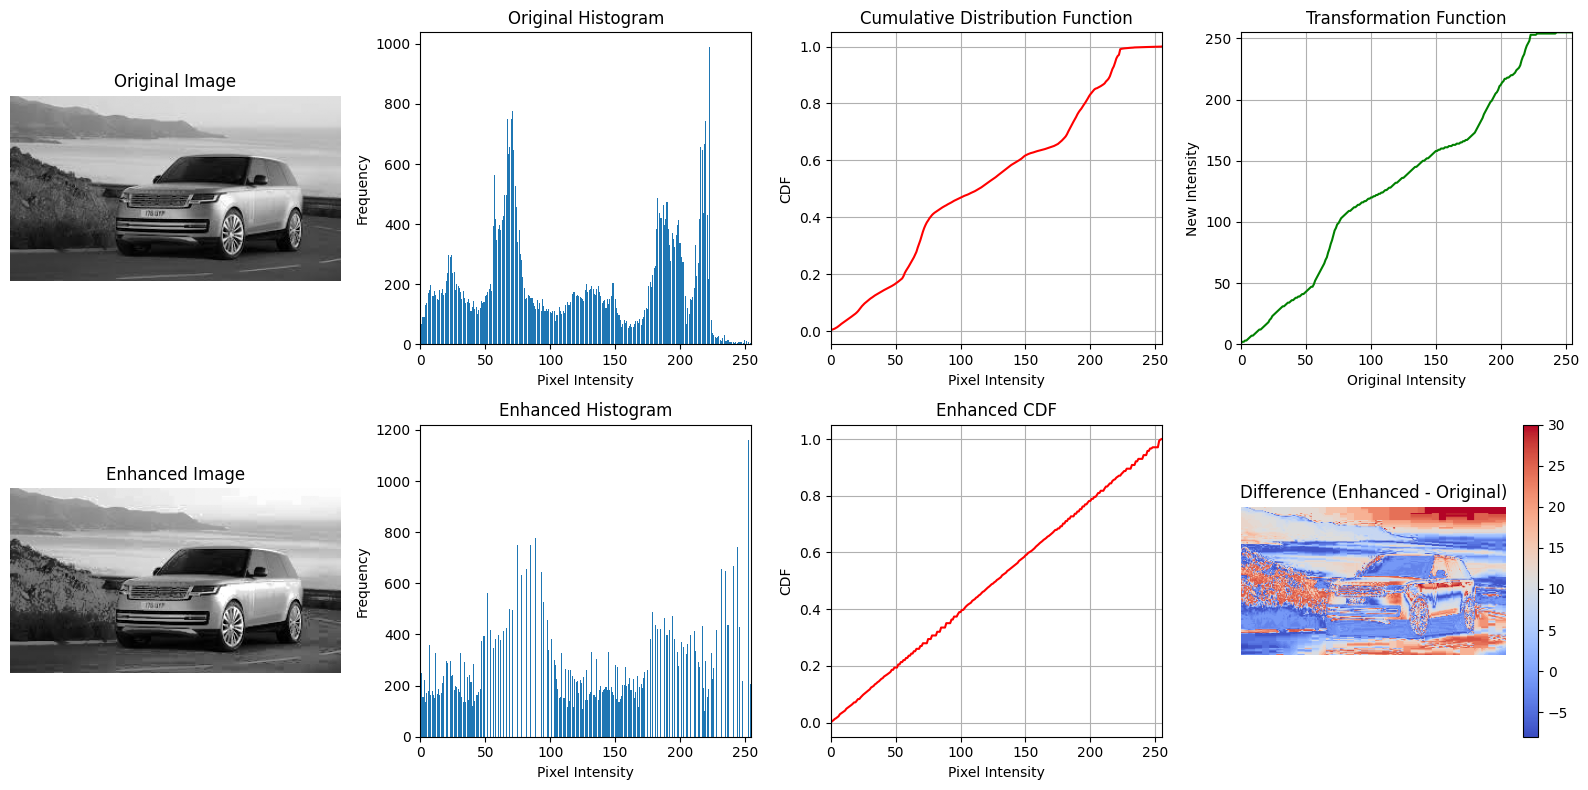


Original Image Statistics:
  Min intensity: 0
  Max intensity: 255
  Mean intensity: 119.97
  Standard deviation: 69.68

Enhanced Image Statistics:
  Min intensity: 1
  Max intensity: 255
  Mean intensity: 128.33
  Standard deviation: 73.77

Enhanced image saved as 'enhanced_image.jpg'


In [22]:
def main():
    """
    Main function to run histogram equalization
    """


    # Manual implementation
    result = histogram_equalization()

    if result is not None:
        original, enhanced, hist, cdf, new_values = result

        # Display results
        display_results(original, enhanced, hist, cdf, new_values)

        # Calculate and print statistics
        print(f"\nOriginal Image Statistics:")
        print(f"  Min intensity: {np.min(original)}")
        print(f"  Max intensity: {np.max(original)}")
        print(f"  Mean intensity: {np.mean(original):.2f}")
        print(f"  Standard deviation: {np.std(original):.2f}")

        print(f"\nEnhanced Image Statistics:")
        print(f"  Min intensity: {np.min(enhanced)}")
        print(f"  Max intensity: {np.max(enhanced)}")
        print(f"  Mean intensity: {np.mean(enhanced):.2f}")
        print(f"  Standard deviation: {np.std(enhanced):.2f}")

        # Save the enhanced image
        cv2.imwrite('enhanced_image.jpg', enhanced)
        print(f"\nEnhanced image saved as 'enhanced_image.jpg'")
    else:
        print("Failed to process image.")
        return







if __name__ == "__main__":
    # Run the main function
    main()